In [1]:
from google.colab import output
import ipywidgets as widgets
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

df_most_runs = pd.read_csv('/content/gdrive/My Drive/ipldataset/MostRuns2022.csv')
df_most_runs.head(10)

Mounted at /content/gdrive


,POS,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,1,KL Rahul,14,14,2,670,132*,55.83,518,129.34,1,5,58,23
1,2,Shikhar Dhawan,17,17,3,618,106*,44.14,427,144.73,2,4,67,12
2,3,David Warner,16,16,2,548,85*,39.14,407,134.64,0,4,52,14
3,4,Shreyas Iyer,17,17,2,519,88*,34.60,421,123.27,0,3,40,16
4,5,Ishan Kishan,14,13,4,516,99,57.33,354,145.76,0,4,36,30
5,6,Quinton de Kock,16,16,2,503,78*,35.92,358,140.50,0,4,46,22
6,7,Suryakumar Yadav,16,15,3,480,79*,40.00,331,145.01,0,4,61,11
7,8,Devdutt Padikkal,15,15,0,473,74,31.53,379,124.80,0,5,51,8
8,9,Virat Kohli,15,15,4,466,90*,42.36,384,121.35,0,3,23,11
9,10,AB de Villiers,15,14,4,454,73*,45.40,286,158.74,0,5,33,23


In [3]:
columns_to_remove = ['HS', '100', '50', 'Mat','POS']

df_most_runs = df_most_runs.drop(columns=columns_to_remove, errors='ignore')
df_most_runs

,Player,Inns,NO,Runs,Avg,BF,SR,4s,6s
0,KL Rahul,14,2,670,55.83,518,129.34,58,23
1,Shikhar Dhawan,17,3,618,44.14,427,144.73,67,12
2,David Warner,16,2,548,39.14,407,134.64,52,14
3,Shreyas Iyer,17,2,519,34.60,421,123.27,40,16
4,Ishan Kishan,13,4,516,57.33,354,145.76,36,30
...,...,...,...,...,...,...,...,...,...
128,Khaleel Ahmed,1,0,0,0.00,2,0.00,0,0
129,Arshdeep Singh,1,0,0,0.00,3,0.00,0,0
130,Daniel Sams,1,0,0,0.00,2,0.00,0,0
131,Shreevats Goswami,2,0,0,0.00,4,0.00,0,0


In [4]:
from sklearn.model_selection import train_test_split

X = df_most_runs[['Inns', 'Avg', 'SR', 'NO', 'BF']]
y = df_most_runs['Runs']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

regressor = DecisionTreeRegressor(random_state=42)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)



Mean Squared Error: 970.2222222222222


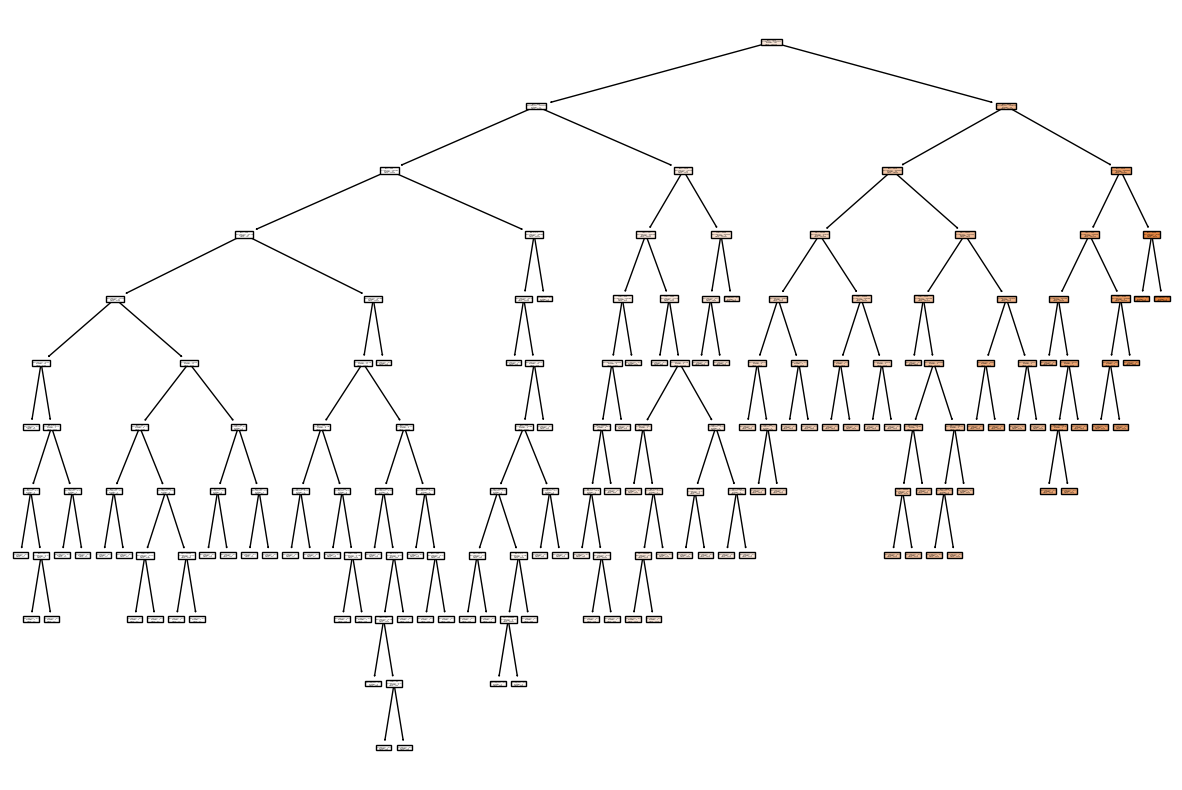

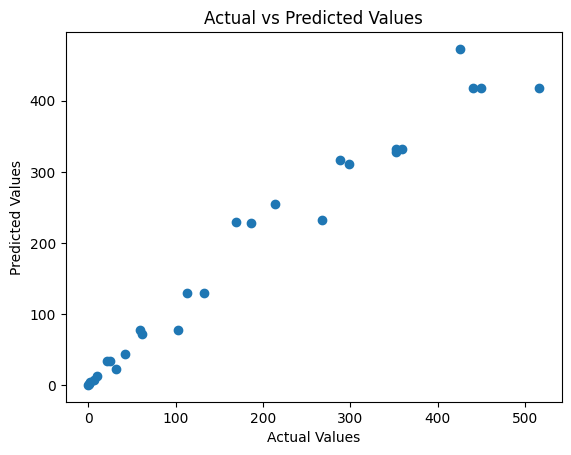

In [6]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

plt.figure(figsize=(15, 10))
plot_tree(regressor, filled=True, feature_names=X.columns)
plt.show()

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

In [9]:
import pandas as pd
from ipywidgets import widgets, interact

players = df_most_runs['Player'].tolist()

player_dropdown = widgets.Dropdown(options=players, description='Select Player:')
balls_input = widgets.IntText(value=0, description='Number of Balls:')
runs_input = widgets.IntText(value=0, description='Required Runs:')

output = widgets.Output()

global player_name, num_balls, required_runs

def on_submit_button_click(b):
    global player_name, num_balls, required_runs
    with output:
        try:
            player_name = str(player_dropdown.value)
            num_balls = int(balls_input.value)
            required_runs = int(runs_input.value)

            selected_player_info = {
                'Player Name': player_name,
                'Number of Balls': num_balls,
                'Required Runs': required_runs
            }

            print("Information successfully saved:")
            print(selected_player_info)

        except ValueError as e:
            print(f"Error: {e}. Please enter valid integer values for balls and runs.")


submit_button = widgets.Button(description='Submit')
submit_button.on_click(on_submit_button_click)

widgets.VBox([player_dropdown, balls_input, runs_input, submit_button, output])


In [10]:
selected_player_data = df_most_runs[df_most_runs['Player'] == player_name].iloc[0]

selected_player_features = selected_player_data[['Inns', 'Avg', 'SR', 'NO', 'BF']]
selected_player_features['Inns']=1
selected_player_features['BF']=num_balls

global predicted_run
if set(selected_player_features.index) == set(X.columns):
    new_data = selected_player_features.values.reshape(1, -1)

    player_prediction = regressor.predict(new_data)
    print(f"Predicted Runs for {player_name}: {player_prediction[0]}")
    predicted_run=player_prediction[0]
else:
    print("Feature names do not match.")


if(predicted_run>=required_runs):
    print("99%")
else:
    print((predicted_run/required_runs)*100,'%')


Predicted Runs for Nitish Rana: 9.0
69.23076923076923 %


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
